### Andrew Seeley
### Prof. Nancy Binowski
### Data Science Programming
### Project 3: Sentiment Analysis
#### This project takes in data from the Yelp Fusion API so we can access reviews about restaurants in Hackettstown, NJ. We then perform sentiment analysis on those reviews and create visuals to describe the reviews' contents.

#### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#### Main question: What do restaurant patrons care about most when leaving a review?
#### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### The first step is to set up our data extraction using the API:

In [1]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

In [3]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [5]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'San Francisco, CA'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [7]:
response = search(API_KEY,DEFAULT_TERM, 'Hackettstown, NJ')

Querying https://api.yelp.com/v3/businesses/search ...


In [9]:
response

{'businesses': [{'id': 'iWy237OhqzO0UhBMFM1mPA',
   'alias': 'james-on-main-hackettstown',
   'name': 'James On Main',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/95k90P_gBKZ19BCB45jiAQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/james-on-main-hackettstown?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 329,
   'categories': [{'alias': 'newamerican', 'title': 'New American'},
    {'alias': 'steak', 'title': 'Steakhouses'}],
   'rating': 4.6,
   'coordinates': {'latitude': 40.85482, 'longitude': -74.83109},
   'transactions': ['delivery'],
   'price': '$$',
   'location': {'address1': '105 Main St',
    'address2': '',
    'address3': '',
    'city': 'Hackettstown',
    'zip_code': '07840',
    'country': 'US',
    'state': 'NJ',
    'display_address': ['105 Main St', 'Hackettstown, NJ 07840']},
   'phone': '+19088522131',
   'display_phone': '(908

In [26]:
reviews_list = []

In [28]:
for business in response['businesses']:
    print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        # Place the reviews and sentiment values into a dictionary
        reviews_list.append(review['text'])
        if sentiment > 0:
            print('    Sentiment: Positive')
        elif sentiment < 0:
            print('    Sentiment: Negative')
        else:
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')
        



{'businesses': [{'id': 'iWy237OhqzO0UhBMFM1mPA', 'alias': 'james-on-main-hackettstown', 'name': 'James On Main', 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/95k90P_gBKZ19BCB45jiAQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/james-on-main-hackettstown?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 329, 'categories': [{'alias': 'newamerican', 'title': 'New American'}, {'alias': 'steak', 'title': 'Steakhouses'}], 'rating': 4.6, 'coordinates': {'latitude': 40.85482, 'longitude': -74.83109}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '105 Main St', 'address2': '', 'address3': '', 'city': 'Hackettstown', 'zip_code': '07840', 'country': 'US', 'state': 'NJ', 'display_address': ['105 Main St', 'Hackettstown, NJ 07840']}, 'phone': '+19088522131', 'display_phone': '(908) 852-2131', 'distance': 441.05457853417084}, {'id': '0TymjOKauXInMFMUUhS1

### Now we have the reviews, so let's take a quick look at them before doing any analysis.

In [30]:
reviews_list

['Word of mouth is the best way to discover new restaurants so when we were told about James on Main, we simply had to try it. And we were nit disappointed,...',
 "One of my friends was RAVING about this restaurant so of course I had to give it a try  I'm generally a picky eater, and my friend said if I'm trying new...",
 'Made my top 3 favorite restaurants. The experience was perfect- polite helpful staff, very warm vibe decor and the food was SPOT on.  Highly recommended',
 'HACKETTSTOWN:  From catering for an event with the Dalai Lama, hosting the Happy Gilmore film crew and NJ native Queen Latifa, to knowing Gene Simmons and...',
 "This is the second time I have been to mama's. The first  few years ago was a big success. I ordered the pear Gorgonzola pasta and it was DELICIOUS!\n\nThis...",
 'Who knew an Italian restaurant with the largest vegan menu I have seen anywhere! Walking in we were asked if we wanted a vegan and or traditional menu; my...',
 'This is my favorite place for 

### While we perform our sentiment analysis, we'll keep track of which reviews are positive, negative, or neutral, so we can create a visual afterwards.

In [32]:
pos = 0
neg = 0
neutral = 0

for review in reviews_list:
    blob = TextBlob(review)
    print(blob)
    sentiment = blob.sentiment.polarity
    print(sentiment)
    if sentiment > 0:
        pos += 1
    elif sentiment < 0:
        neg += 1
    else:
        neutral += 1
        

Word of mouth is the best way to discover new restaurants so when we were told about James on Main, we simply had to try it. And we were nit disappointed,...
0.1106060606060606
One of my friends was RAVING about this restaurant so of course I had to give it a try  I'm generally a picky eater, and my friend said if I'm trying new...
0.09318181818181819
Made my top 3 favorite restaurants. The experience was perfect- polite helpful staff, very warm vibe decor and the food was SPOT on.  Highly recommended
0.5880000000000001
HACKETTSTOWN:  From catering for an event with the Dalai Lama, hosting the Happy Gilmore film crew and NJ native Queen Latifa, to knowing Gene Simmons and...
0.8
This is the second time I have been to mama's. The first  few years ago was a big success. I ordered the pear Gorgonzola pasta and it was DELICIOUS!

This...
0.225
Who knew an Italian restaurant with the largest vegan menu I have seen anywhere! Walking in we were asked if we wanted a vegan and or traditional me

### Creating a donut chart using the TextBlob sentiment analysis:

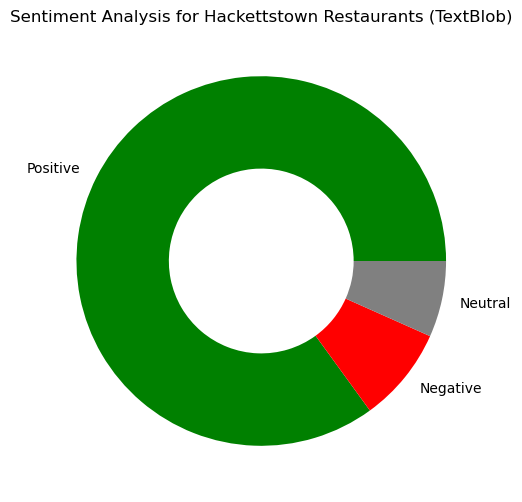

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
labels = ['Positive', 'Negative', 'Neutral']
values = [pos, neg, neutral]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red', 'grey'])
ax.set_title('Sentiment Analysis for Hackettstown Restaurants (TextBlob)')

plt.show()

#### The vast majority of the reviews had a positive sentiment, with only a few being negative or neutral.

### Creating a donut chart using the NaiveBayes sentiment analysis:

In [36]:
from textblob.sentiments import NaiveBayesAnalyzer

In [44]:
pos = 0
neg = 0
neutral = 0

for review in reviews_list:
    blob = TextBlob(review, analyzer=NaiveBayesAnalyzer() )
    sentiment = blob.sentiment
    if sentiment.classification == 'pos':
        pos += 1
    elif sentiment.classification == 'neg':
        neg += 1
    else:
        neutral += 1

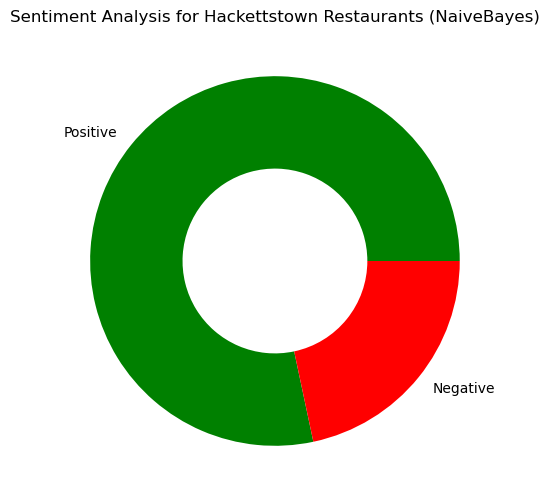

In [52]:
# Define data
labels = ['Positive', 'Negative']
values = [pos, neg]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis for Hackettstown Restaurants (NaiveBayes)')

plt.show()

#### More of the reviews were deemed negative by the NaiveBayes analyzer. None of them were perfectly neutral.

### Deleting stop words from the reviews:

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')  #a sentence tokenizer with parts of speech taggers
nltk.download('brown') # the corpora created in the 1960's at Brown University
nltk.download('movie_reviews')  # movie review text
nltk.download('wordnet')
from nltk.corpus import stopwords

In [61]:
stops = stopwords.words('english')

In [71]:
cleanreviews = []

In [ ]:
for review in reviews_list:
    blob = TextBlob(review)
    nostops = [word for word in blob.words if word not in stops]
    print(nostops)
    cleanreviews.append(nostops)

In [ ]:
cleanreviews

### Creating a word cloud of the most common words:

In [79]:
from wordcloud import WordCloud

In [83]:
allreviews = ''

In [85]:
for review in reviews_list:
    allreviews += review + ' '

In [ ]:
allreviews

In [89]:
blob = TextBlob(allreviews)

In [ ]:
items = blob.word_counts.items()
print(len(items))
items

In [ ]:
items = [item for item in items if item[0] not in stops]
len(items)
items

In [99]:
from operator import itemgetter

In [101]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [113]:
top_20 = sorted_items[0:21]
top_20

[('food', 17),
 ('place', 17),
 ('good', 16),
 ('delicious', 12),
 ('service', 11),
 ('first', 9),
 ('great', 9),
 ('amazing', 8),
 ('staff', 7),
 ('always', 7),
 ('best', 6),
 ('time', 6),
 ('ordered', 6),
 ('also', 6),
 ("n't", 6),
 ('disappointed', 5),
 ('one', 5),
 ('get', 5),
 ('love', 5),
 ('restaurant', 4),
 ('perfect', 4)]

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df = pd.DataFrame(top_20, columns=['word','count'])

In [115]:
df

,word,count
0,food,17
1,place,17
2,good,16
3,delicious,12
4,service,11
5,first,9
6,great,9
7,amazing,8
8,staff,7
9,always,7


In [117]:
# drop item 14 since it is not a word
df = df.drop(df.index[14])
df

,word,count
0,food,17
1,place,17
2,good,16
3,delicious,12
4,service,11
5,first,9
6,great,9
7,amazing,8
8,staff,7
9,always,7


In [127]:
wordcloud = WordCloud(colormap='prism',background_color='white', max_words=20)

In [129]:
text = allreviews

In [131]:
wordcloud = wordcloud.generate(text)

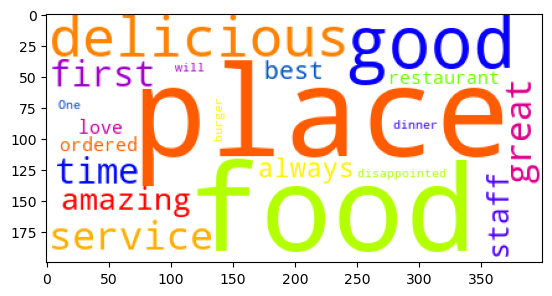

In [132]:
plt.imshow(wordcloud)

#### The most common comments were about the food and the place itself, as well as the service and staff.

### Conclusions:

#### The food in Hackettstown seems to have very good reviews. Most people seem to discuss the quality of the food in their reviews, which would make sense. Many people also mention the staff or service. 